In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
total_num_cpus = 10000

max_cpus = 5000
max_time = 1000
maxjob = max_cpus * max_time

def get_random_jobs(num):
    jobs = np.random.randint(low=(1,1), high=(max_time, max_cpus), size=(num, 2))
    return jobs

num = 10000
jobs = get_random_jobs(num)
print(jobs)

[[ 392 2256]
 [ 198 2247]
 [ 974 4543]
 ...
 [ 138 2141]
 [ 671  201]
 [  62 2248]]


Text(0, 0.5, 'Count')

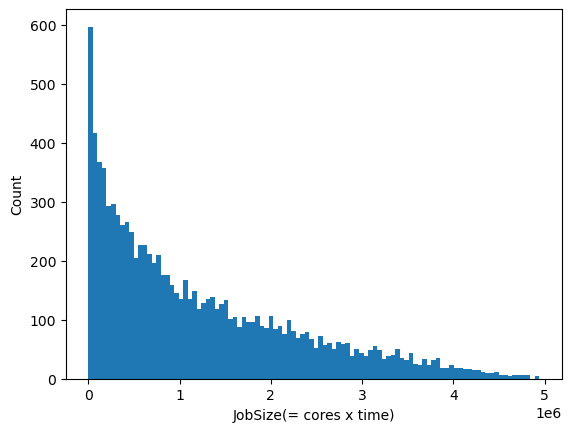

In [3]:
d, x, ax = plt.hist(jobs.prod(axis=1), bins=100)
plt.xlabel("JobSize(= cores x time)")
plt.ylabel("Count")

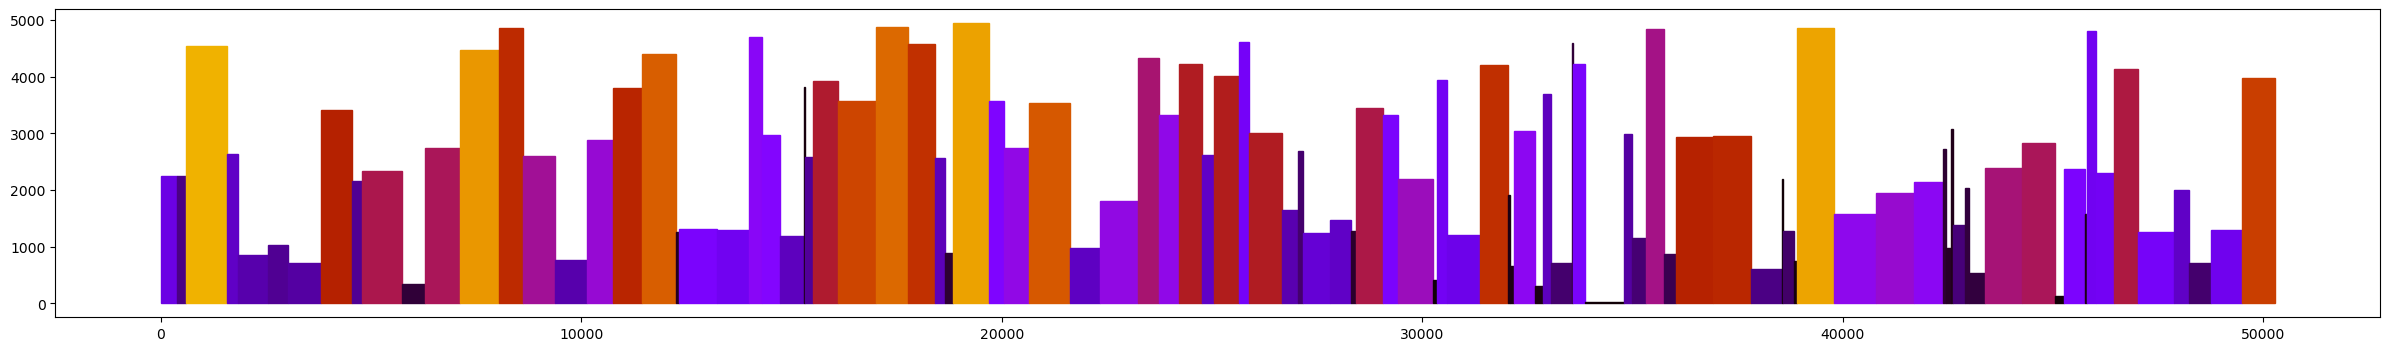

In [4]:
start, end = 0, 100
shift = 0
mcm = plt.cm.gnuplot

plt.figure(figsize=(30,4))
for job in jobs[start:end]:
    x, y = job
    sq = np.array([(shift, 0), (shift + x, 0), (shift + x, y), (shift, y)]).T
    plt.fill(sq[0], sq[1], c=mcm(x*y/maxjob))
    shift += x
plt.show()

In [18]:
from manim import *
config.media_width = "100%"
config.verbosity = "WARNING"

In [23]:
class DifferentRotations(Scene):
    def construct(self):
        left_square = Square(color=BLUE, fill_opacity=0.7).shift(2 * LEFT)
        right_square = Square(color=GREEN, fill_opacity=0.7).shift(2 * RIGHT)
        self.play(
            left_square.animate.rotate(PI/2), Rotate(right_square, angle=PI), run_time=2
        )
        self.play(
            left_square.animate.rotate(PI/2), Rotate(right_square, angle=PI), run_time=2
        )
        self.wait()
%manim -qm DifferentRotations